In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("/content/drive/MyDrive/hedvig/data/processed/n_claims_process.csv")
data.head()

,owner_age,owner_gender,geo_zone,vehicle_classification,vehicle_age,duration,n_claims,claim_cost
0,0,M,1,4,12,0.175342,0,0
1,4,M,3,6,9,0.000000,0,0
2,5,K,3,3,18,0.454795,0,0
3,5,K,4,1,25,0.172603,0,0
4,6,K,2,1,26,0.180822,0,0


In [13]:
data.dtypes

,0
owner_age,int64
owner_gender,object
geo_zone,int64
vehicle_classification,int64
vehicle_age,int64
duration,float64
n_claims,int64
claim_cost,int64


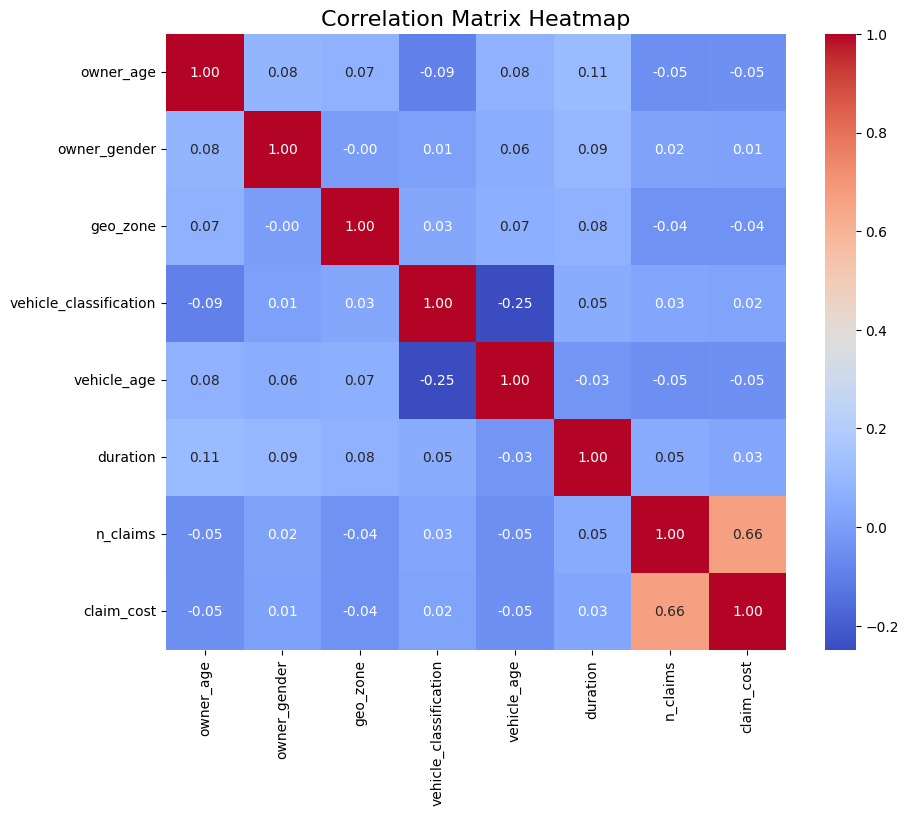

In [14]:
data['owner_gender'] = data['owner_gender'].map({'M': 1, 'K': 0})
data['owner_gender'] = pd.to_numeric(data['owner_gender'])
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

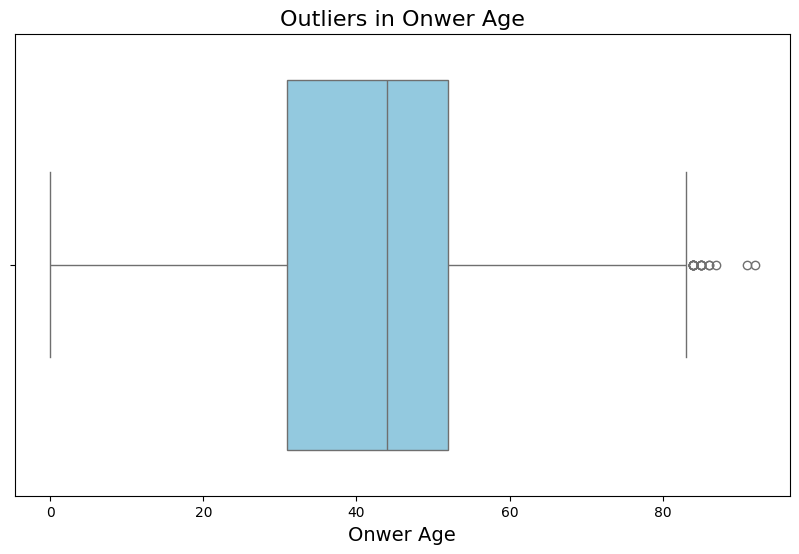

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='owner_age', color='skyblue')
plt.title('Outliers in Onwer Age', fontsize=16)
plt.xlabel('Onwer Age', fontsize=14)
plt.show()


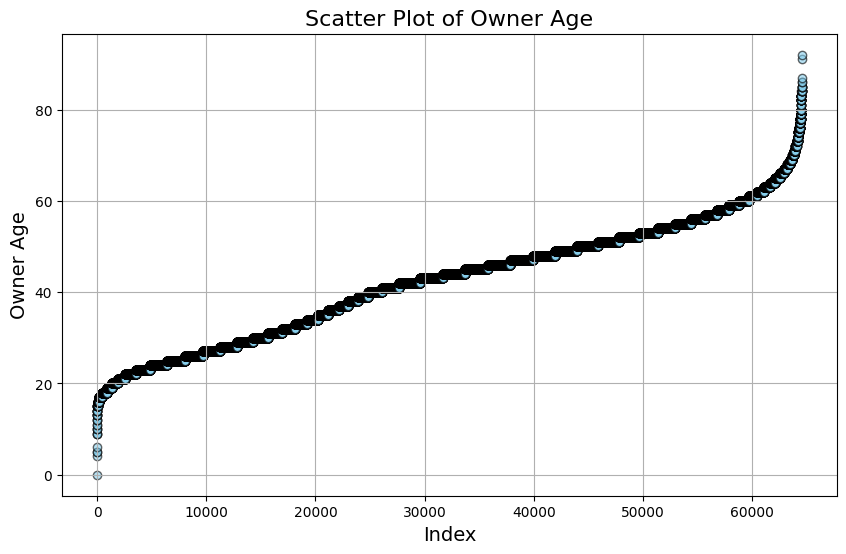

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['owner_age'], alpha=0.6, color='skyblue', edgecolor='k')
plt.title('Scatter Plot of Owner Age', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Owner Age', fontsize=14)
plt.grid(True)
plt.show()


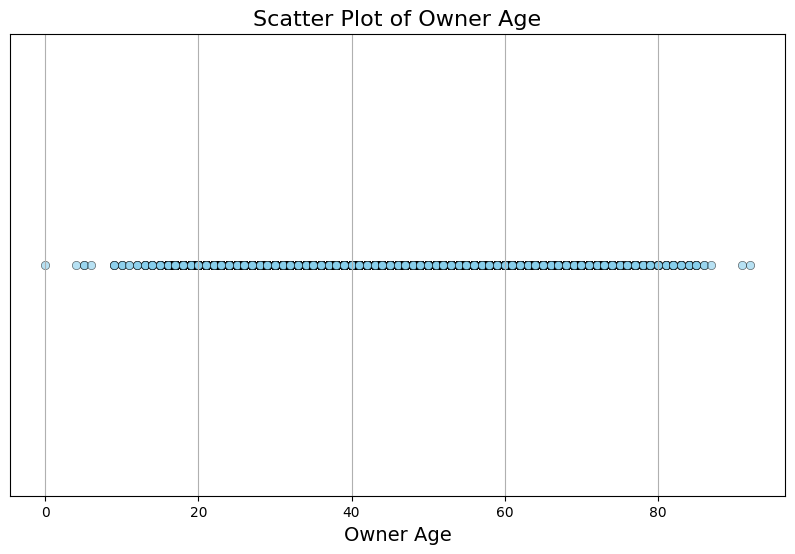

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='owner_age', y=[0] * len(data), alpha=0.6, color='skyblue', edgecolor='k')
plt.title('Scatter Plot of Owner Age', fontsize=16)
plt.xlabel('Owner Age', fontsize=14)
plt.ylabel('', fontsize=14)
plt.yticks([])  # Hide the y-axis ticks since we are only focusing on the distribution of `owner_age`
plt.grid(True, axis='x')
plt.show()


In [24]:
data.duplicated().value_counts()

,count
False,63350
True,1198


In [25]:
duplicates = data[data.duplicated()]
print(duplicates)

       owner_age  owner_gender  geo_zone  vehicle_classification  vehicle_age  \
217           17             1         1                       1           14   
941           19             0         5                       4           14   
1005          19             1         2                       1           21   
1337          19             1         6                       1           25   
1813          20             1         4                       6            6   
...          ...           ...       ...                     ...          ...   
64064         72             1         4                       5           14   
64147         73             1         4                       3           12   
64157         73             1         4                       3           18   
64220         74             1         4                       3           13   
64285         75             1         4                       3           14   

       duration  n_claims  

In [26]:
print(data.shape)
data_cleaned = data.drop_duplicates()
data_cleaned.shape

(64548, 8)


(63350, 8)

<ipython-input-27-a46baab35809>:2: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data_cleaned, y='n_claims', hue='n_claims', palette=['#BBAB8C', '#503C3C'])


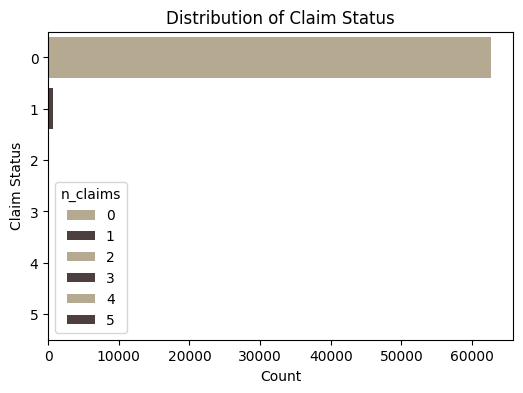

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data_cleaned, y='n_claims', hue='n_claims', palette=['#BBAB8C', '#503C3C'])
plt.xlabel('Count')
plt.ylabel('Claim Status')
plt.title('Distribution of Claim Status')
plt.show()

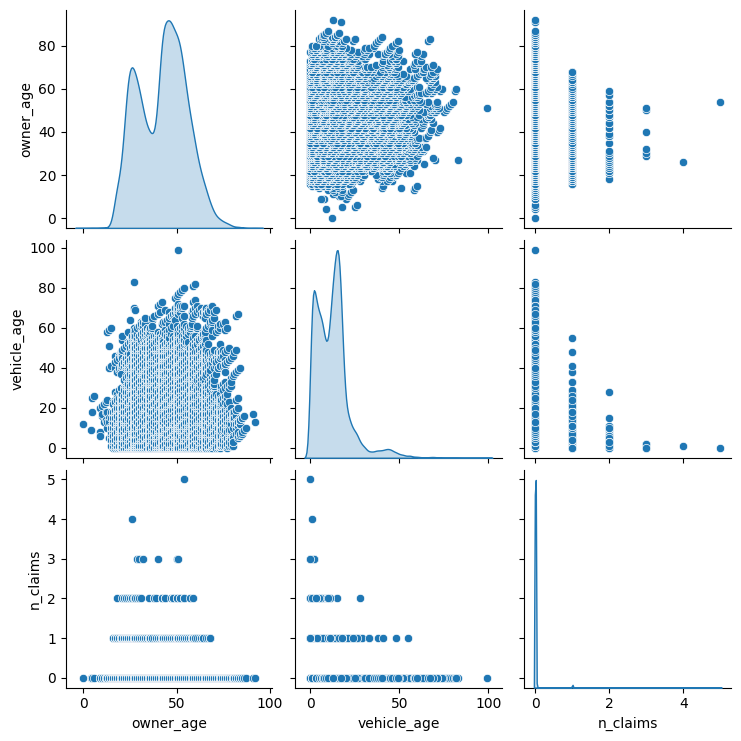

In [28]:
sns.pairplot(data_cleaned[['owner_age', 'vehicle_age', 'n_claims']], diag_kind='kde')
plt.show()

In [29]:
data_cleaned['vehicle_age'].value_counts()

,count
vehicle_age,
15,3954
16,3881
14,3599
1,3367
13,3315
...,...
79,1
80,1
81,1


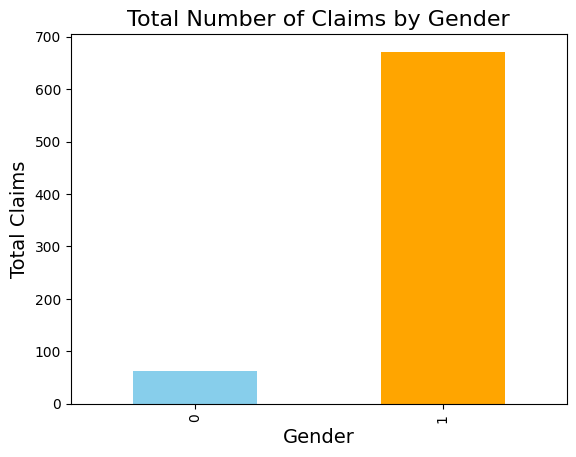

In [32]:
data_cleaned.groupby('owner_gender')['n_claims'].sum().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Total Number of Claims by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Total Claims', fontsize=14)
plt.show()


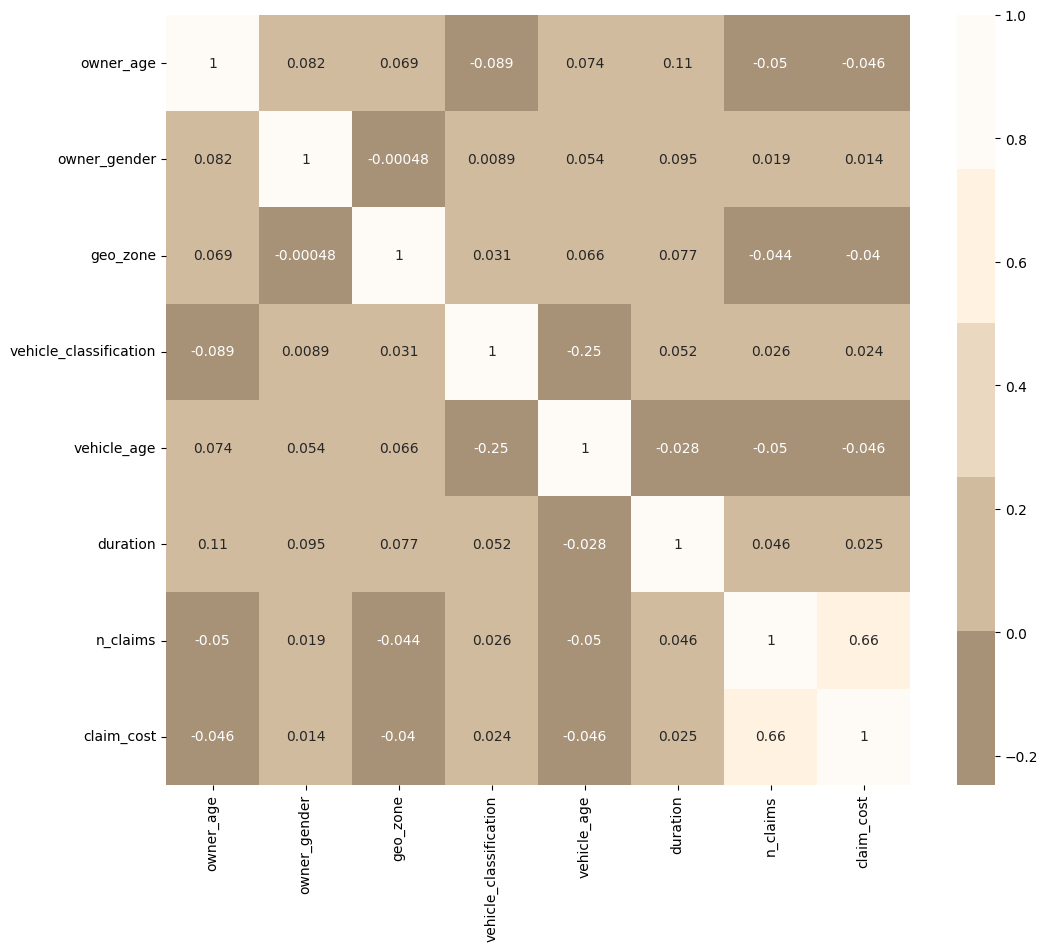

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_cleaned.select_dtypes(include='number').corr(), annot=True, cmap=['#A79277', '#D1BB9E', '#EAD8C0', '#FFF2E1', '#FEFAF6'])
plt.show()